In [1]:
import numpy as np
import trimesh
from trimesh.registration import icp

import matplotlib.pyplot as plt

In [2]:

msh = trimesh.load_mesh("poisson.ply")

In [7]:
with open("sfm.csv") as f:
    pts = np.asarray([[float(e) for e in row.strip().split(",")] for row in f.readlines()[1:]])[:,:3]
pts[:,2] = pts[:,2] + np.mean(msh.vertices[:,2]) - np.mean(pts[:,2])

In [4]:
z_extents = msh.bounds[:,2]
z_levels  = np.arange(*z_extents, step=0.25)
z_levels = z_levels # - np.min(z_levels)
sections = msh.section_multiplane(plane_origin=[0,0,0], 
                                   plane_normal=[0,0,1], 
                                   heights=z_levels)
ref_pts = np.vstack([np.hstack([section.vertices, z*np.ones((section.vertices.shape[0], 1))]) 
                     for section, z in zip(sections[1:], z_levels[1:])])   

In [20]:
tfm, pts_tfm, _ = icp(pts, np.vstack([ref_pts, msh.vertices]), reflection=False, translation=True, scale=True)

In [21]:
print(tfm)

[[ 9.23519207e-01 -1.40038006e-01  2.21736022e-02  6.28878128e+05]
 [ 1.41279950e-01  9.21215078e-01 -6.62781484e-02  2.77960247e+05]
 [-1.19284250e-02  6.88634466e-02  9.31721834e-01 -2.88693497e+05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


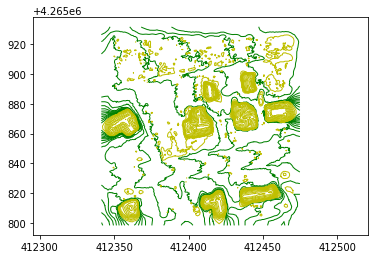

In [22]:
np.sum(sections[1:]).show()

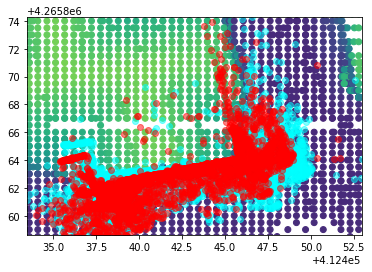

In [23]:
plt.figure()
plt.scatter(msh.vertices[:,0], msh.vertices[:,1], c=msh.vertices[:,2])
plt.scatter(pts[:,0], pts[:,1], c="cyan", alpha=0.5)
plt.scatter(pts_tfm[:,0], pts_tfm[:,1], c="red", alpha=0.5)
plt.xlim([pts[:,0].min(), pts[:,0].max()])
plt.ylim([pts[:,1].min(), pts[:,1].max()])
plt.show()

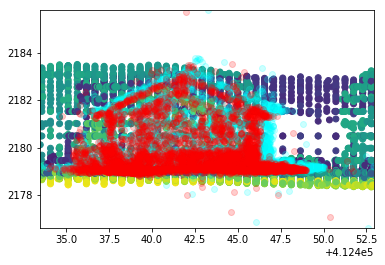

In [24]:
plt.figure()
plt.scatter(msh.vertices[:,0], msh.vertices[:,2], c=msh.vertices[:,1])
plt.scatter(pts[:,0], pts[:,2], c="cyan", alpha=0.2)
plt.scatter(pts_tfm[:,0], pts_tfm[:,2], c="red", alpha=0.2)
plt.xlim([pts[:,0].min(), pts[:,0].max()])
plt.ylim([pts[:,2].min(), pts[:,2].max()])
plt.show()

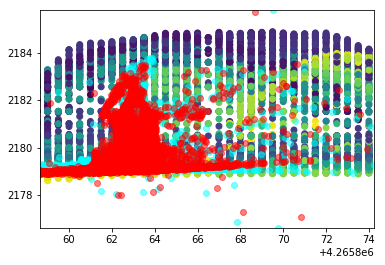

In [25]:
plt.figure()
plt.scatter(msh.vertices[:,1], msh.vertices[:,2], c=msh.vertices[:,0])
plt.scatter(pts[:,1], pts[:,2], c="cyan", alpha=0.5)
plt.scatter(pts_tfm[:,1], pts_tfm[:,2], c="red", alpha=0.5)
plt.xlim([pts[:,1].min(), pts[:,1].max()])
plt.ylim([pts[:,2].min(), pts[:,2].max()])
plt.show()